In [1]:
from Test import data
from Test import file_name
from Test import SN_LC
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


from matplotlib.pyplot import figure
from Test import rise1

from Test import fall
from Test import curvefitting_and_plot

1.311
-0.1227643037738024
58211.214
58211.214 58221.893
16.966999999996915
10.67899999999645
17.064 18.375


TypeError: The number of func parameters=7 must not exceed the number of data points=4

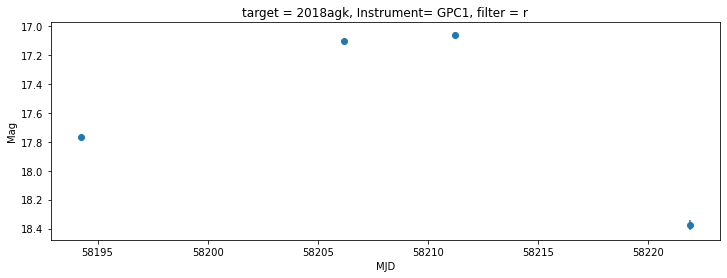

In [6]:
# test for GPC1 in g filter
target = "2018agk"

file_location = file_name(target)
original_data = data(file_location,'gp', 'Sinistro') # plot based on the the Instrument gp band
time = np.array(original_data[0]) #MJD
#print(time)
mags = np.array(original_data[1]) #Mag
mag_errors = np.array(original_data[2]) #Magerr
y = mags
x =time
print(np.max(y)-np.min(y))
print(- (np.min(y) - y[np.argmax(x)]) / (x[np.argmin(y)] - np.max(x)))
print(x[np.argmin(y)])
print(x[np.argmin(y)], np.max(x))
print(x[np.argmin(y)] - np.min(x))
print(np.max(x) - x[np.argmin(y)])

print(np.min(y),np.max(y))  
curvefitting_and_plot(SN_LC, time, mags, dy = mag_errors, target_and_filter_inst = 'target = 2018agk, Instrument= GPC1, filter = r' )
